# Combined clustering & merging pipeline


### Modules

In [1]:
# Python modules
import os

#### DistantSigMA modules
from misc import utilities as ut
from DistantSigMA.clustering_routine import *
from DistantSigMA.DistantSigMA.cluster_simulations import calculate_std_devs
from DistantSigMA.DistantSigMA.scalefactor_sampling import lhc_lloyd

# Tree/Graph modules
from alex_workspace.ClusterHandler import ClusteringHandler
from alex_workspace.NxGraphAssistant import NxGraphAssistant
from alex_workspace.PlotHandler import PlotHandler
from alex_workspace.Tree import Custom_Tree

## Setup

In [2]:
# Paths
output_path = ut.set_output_path(script_name="combined_pipeline")

run = "combined_pipe_all_KNN"
output_path = output_path + f"{run}/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

## Data

In [3]:
# load the dataframe
df_load = pd.read_csv('../Data/Segments/Orion_labeled_segments_KNN_300_15-11-23.csv')
# df_load = pd.read_csv("/Users/alena/Downloads/Box_0.csv")

# df_load= df_load.reset_index(drop=True)


# load data for error sampling (already slimmed)
error_sampling_df = pd.read_csv("../Data/Gaia/Gaia_DR3_500pc_10percent.csv")
#error_sampling_df["dist"] = 1000 / error_sampling_df["parallax"]
#error_sampling_df.to_csv("../Data/Gaia/Gaia_DR3_1000pc_rs.csv")

### Choosing data chunks

In [4]:
# in case of using segmented data
chunk_labels = df_load.region
chunk = 1
df_chunk = df_load[df_load.region == chunk]

# extend output path
result_path = output_path + f"Region_{int(chunk)}/"
if not os.path.exists(result_path):
    os.makedirs(result_path)

## Clustering

Currently written for the scenario that the input is a single chunk without need for further splitting.

### A) Preliminary solution

In [5]:
# Cluster parameters
dict_prelim = dict(alpha=0.01,
                   beta=0.99,
                   knn_initcluster_graph=35,
                   KNN_list=[15, 20, 25, 30],
                   sfs=[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55],
                   scaling="robust",
                   bh_correction=True)

In [6]:
print(f"PART A) Starting clustering ... \n")

df_prelim = run_clustering(region_label=chunk, df_input=df_chunk, sf_params="parallax_scaled",
                           parameter_dict=dict_prelim, mode="prelim", output_loc=result_path)

PART A) Starting clustering ... 

-- Current run with KNN = 15 -- 

Creating k-d trees of resampled data sets...
Performing clustering for scale factor 0.1...
Performing gradient ascend using a 15-NN density estimation.
Updated significance threshold: 1.48e-04
Creating k-d trees of resampled data sets...
Performing clustering for scale factor 0.15...
Performing gradient ascend using a 15-NN density estimation.
Updated significance threshold: 5.06e-04
Creating k-d trees of resampled data sets...
Performing clustering for scale factor 0.2...
Performing gradient ascend using a 15-NN density estimation.
Updated significance threshold: 5.89e-04
Creating k-d trees of resampled data sets...
Performing clustering for scale factor 0.25...
Performing gradient ascend using a 15-NN density estimation.
Updated significance threshold: 5.63e-04
Creating k-d trees of resampled data sets...
Performing clustering for scale factor 0.3...
Performing gradient ascend using a 15-NN density estimation.
Update

### B) Simulate clusters and determine scale factors

In [7]:

print(f"PART B) Simulating clusters ... \n")

stds = calculate_std_devs(input_df=df_prelim, SigMA_dict=dict_prelim, sampling_data= error_sampling_df, n_artificial = 1, sample_radius= 2, output_path = result_path, plot_figs = False)

# save scaling factors in Data directory
directory = "../Data/Scale_factors"
filename = f"sfs_region_{chunk}.txt"

# Open the file in write mode ('w')
with open(f"{directory}/{filename}", 'w') as file:
    for i, label in enumerate(["ra", "dec", "parallax", "pmra", "pmdec"]):
        print(f"{label}:", np.min(stds[i, :]), np.mean(stds[i, :]), np.max(stds[i, :]), file=file)

PART B) Simulating clusters ... 



/opt/anaconda3/envs/Sigma_Orion/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/alena/PycharmProjects/Distant_SigMA/DistantSigMA/DistantSigMA/cluster_simulations.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/alena/PycharmProjects/Distant_SigMA/DistantSigMA/DistantSigMA/cluster_simulations.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

### C) Cluster with new SF

In [8]:
# determine the number of SF to draw using lhc_lloyd sampling
num_sf = 75

-- Current run with KNN = 15 -- 

Creating k-d trees of resampled data sets...
Performing clustering for scale factor p[5.687773208365364, 4.6705811899673595, 6.816860385055232][7.739262926648848, 5.5824226972115385]...
Performing gradient ascend using a 15-NN density estimation.
Creating k-d trees of resampled data sets...
Performing clustering for scale factor p[4.13970769890428, 3.9051889330848346, 7.08290364395224][6.69413914018, 2.650307831091764]...
Performing gradient ascend using a 15-NN density estimation.
Creating k-d trees of resampled data sets...
Performing clustering for scale factor p[7.304931723740378, 2.577900769943851, 7.702123512989813][5.834046454687019, 4.941586924934861]...
Performing gradient ascend using a 15-NN density estimation.
Creating k-d trees of resampled data sets...
Performing clustering for scale factor p[2.418795183257197, 1.9468273287642415, 8.132321898591094][3.3246293846740143, 3.0236488228993554]...
Performing gradient ascend using a 15-NN densit

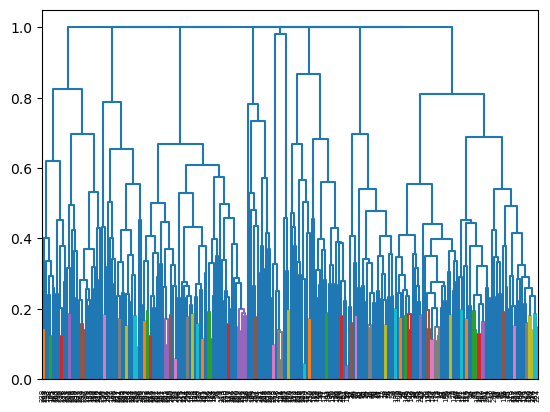

In [9]:
# draw number of scale factors
sfs, means = lhc_lloyd('../Data/Scale_factors/' + f'sfs_region_{chunk}.txt', num_sf)

# determine means for clusterer initialization
scale_factor_means = {'pos': {'features': ['ra', 'dec', 'parallax'], 'factor': list(means[:3])},
                      'vel': {'features': ['pmra', 'pmdec'], 'factor': list(means[3:])}}

# dict for final clustering
dict_final = dict(alpha=0.01,
                  beta=0.99,
                  knn_initcluster_graph=35,
                  KNN_list=[15, 20, 25, 30],
                  sfs=sfs,
                  scaling=None,
                  bh_correction=False)

# Generate grouped solutions
grouped_labels = partial_clustering(df_input=df_chunk, sf_params=["ra", "dec", "parallax", "pmra", "pmdec"], parameter_dict=dict_final, mode="final",output_loc=result_path, column_means=scale_factor_means)

print(grouped_labels.shape)
# add the grouped solution labels to the dataframe holding the observations
df_final = df_chunk.copy()
for col in range(grouped_labels.shape[0]):
    df_final.loc[:, f"cluster_label_group_{col}"] = grouped_labels[col, :]

#df_final.to_csv(result_path+f"Region_{chunk}_sf_{num_sf}_grouped_solutions.csv")

### D) Tree/Graph

Below this point, the routine follows the minimal_usage.ipynb script from Alex.

In [17]:
# Creating instances of custom classes
clusterMaster = ClusteringHandler()  # Manages cluster operations

#### Graph handling

In [18]:
# make consensus over the grouped labels that came out of step C)
cc = ClusterConsensus(*grouped_labels)  # creates graph object cc.G
translation = cc.labels_bool_dict2arr

#rename the similarity in every edge to "weight"
for i, j, d in cc.G.edges(data=True):
    d['weight'] = d['similarity']
    d['weight_minor'] = d['similarity_minor']
    del d['similarity']
    del d['similarity_minor']

In [19]:
#FIXME optimize me
# Jaccard (minor) distances
graph = NxGraphAssistant.remove_edges_with_minor(cc.G, 'weight', 0.7, 0.3)

#FIXME optimize me
# Merging thresholds for cliques (inner average Jaccard distance)
graph = NxGraphAssistant.analyze_cliques(graph, 0.9)

#### Plotting

In [20]:
plotter = PlotHandler(translation,df_final, path=result_path)

In [ ]:
labels = clusterMaster.full_pipline_tree_hierachy(graph, Custom_Tree.alex_optimal, translation,plotter,2,1)

In [ ]:
df_chunk["pipe_labels"] = labels
df_chunk.to_csv(result_path+f"Chunk_{chunk}_final_labels.csv")

In [ ]:
plotter.plot_labels_3D(labels, title="test")
plotter.plot_labels_2D(labels)